# Session 22
(15/07/2021)

1. Create our own sklearn package
2. Create module for our plotting utilities
3. Visualize:
    - Decision Boundary on feature plane
    - Surface z
    - Log Loss/ Binary Cross Entropy on univariate data (Understanding Log loss how does it penalize wrong predictions)
4. p = sigmoid(z) which represent the Expection of Bernoulli distribution $P(y_{i}=0|X) = p^({1-y_{i}})(1-p)^{y_{i}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mysklearn.linearmodels import LogisticRegression

In [2]:
# Data Generation

In [10]:
# samples corresponding to class 1
X1 = np.random.multivariate_normal([3, 2], cov=[[3, 0], [0, 1]], size=200)
y1 = np.ones((X1.shape[0], 1))
print(X1.shape)

# samples for class class 0
X2 = np.random.multivariate_normal([9, 8], cov=[[2, 1], [1, 2]], size=200)
y2 = np.zeros((X2.shape[0], 1))
print(X2.shape, y2.shape)

X = np.concatenate([X1, X2])
print(X.shape)

y = np.concatenate([y1, y2])
print(y.shape)

# shuffle the samples
idx = np.arange(X.shape[0])
print(idx.shape)
np.random.shuffle(idx)

X = X[idx]
y = y[idx]

(200, 2)
(200, 2) (200, 1)
(400, 2)
(400, 1)
(400,)


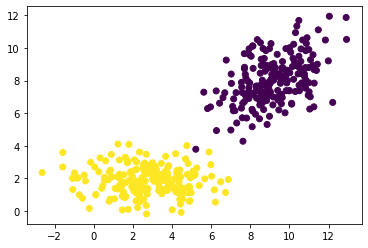

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [12]:
## Save the generate data
path = "../data/LogR/"
np.save(path+"X", X)
np.save(path+"y", y)


In [3]:
# load the data
path = "../data/LogR/"
X = np.load(path+"X.npy")
y = np.load(path+"y.npy")
print(X.shape, y.shape)

(400, 2) (400, 1)


In [4]:
# train test split

def train_test_split(X, y, test_ratio=0.2, shuffle=True):
    test_samples = int(X.shape[0]*test_ratio) # np. of samples in test data
    if shuffle:
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        test_idx, train_idx = idx[:test_samples], idx[test_samples:]
        X_train, y_train, X_test, y_test =  X[train_idx], y[train_idx], X[test_idx], y[test_idx]
        return X_train, y_train, X_test, y_test
    else:
        X_test, y_test, X_train, y_train = X[0:test_samples], y[:test_samples], X[test_samples:], y[test_samples:]
        return X_train, y_train, X_test, y_test

In [5]:
# train test split
X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(320, 2) (320, 1) (80, 2) (80, 1)


epoch: 49, loss: 29.286799220981052, accuracy: 1.0

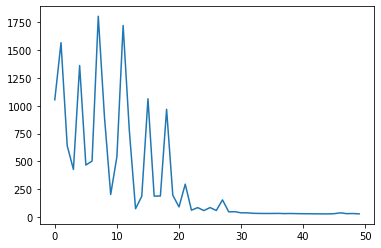

In [6]:
# create instance/ object of my model
logr = LogisticRegression()

# training
losses = logr.fit(X_train, y_train, learning_rate=0.001, epochs=50)

plt.plot(losses)
plt.show()

In [7]:
logr.w

array([[ 4.9220769 ],
       [-0.01563215],
       [-0.99900437]])

In [8]:
# evaluate your model on test/ validation set
ypred = logr.predict(X_test) 
test_acc = logr.accuracy(y_test, ypred)
print(test_acc)

0.9625


## Plot the decision Boundary
z = m1.x1 + m2.x2 + c  
On the feature plane/ space, z=0  
x2 = (-m1.x1 - c )/m2

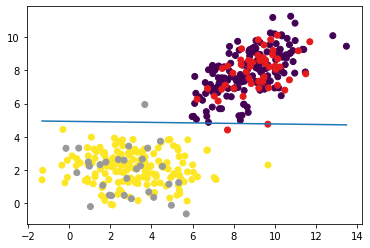

In [9]:
# generate some points for x1 feature
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 20)
m1, m2, c = logr.w[1][0], logr.w[2][0], logr.w[0][0]
x2 = (-m1*x1 - c )/m2

plt.plot(x1, x2) # decision boundary
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.Set1) # plot
plt.show()


# Visualize the Z surface

In [10]:
def predict_Z(w, X):
    """ 
    w : column vector: (n+1,1)
    X: feature vector of 1 pt (m, n)
    """
    return w[0][0] + w[1][0]*X[0] + w[2][0]*X[1]

X1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
X2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)
X1, X2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape)

z = []
for tp in zip(X1.reshape(-1,1), X2.reshape(-1,1)):
    z.append(predict_Z(logr.w, tp))
z = np.array(z).reshape(X1.shape)

(50, 50) (50, 50)


Text(0.5, 0, 'Z')

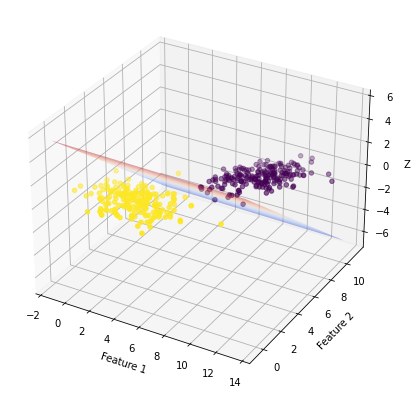

In [12]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, z, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X[:,0], X[:,1], np.zeros(X[:,0].shape), c=y) # data points

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Z")

In [11]:
logr.w

array([[ 4.9220769 ],
       [-0.01563215],
       [-0.99900437]])